<a href="https://colab.research.google.com/github/Leonkeneddy86/Proyecto-III-Flujo-de-Datos-de-SQL-a-Python/blob/main/sakila_customer_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import folium
from google.colab import files
df = pd.read_csv("Customer_Activity.csv")
df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-15 20:25:53,2005-06-22 23:34:53,2.99,2005-06-15 20:25:53,7
1,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 05:49:46,2005-06-20 00:25:46,0.99,2005-06-18 05:49:46,2
2,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 06:10:23,2005-06-20 00:39:23,0.99,2005-06-18 06:10:23,2
3,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-08 20:31:43,2005-07-15 15:58:43,6.99,2005-07-08 20:31:43,7
4,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-09 12:10:44,2005-07-11 17:32:44,0.99,2005-07-09 12:10:44,2


In [4]:
df = pd.read_csv("Customer_Activity.csv")


In [5]:
df = pd.DataFrame(df)

In [6]:
customer_activity_df = df.copy()

In [7]:
customer_activity_df["rental_date"] = pd.to_datetime(customer_activity_df["rental_date"], errors="coerce")
customer_activity_df["return_date"] = pd.to_datetime(customer_activity_df["return_date"], errors="coerce")
customer_activity_df["payment_date"] = pd.to_datetime(customer_activity_df["payment_date"], errors="coerce")

In [8]:
customer_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   object        
 2   last_name        1000 non-null   object        
 3   email            1000 non-null   object        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   object        
 6   district         965 non-null    object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   object        
 9   country          1000 non-null   object        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
customer_id,0
first_name,0
last_name,0
email,0
active,0
address,0
district,35
postal_code,0
city,0
country,0


In [11]:
(df.isnull().sum() / len(df)) * 100

,0
customer_id,0.0
first_name,0.0
last_name,0.0
email,0.0
active,0.0
address,0.0
district,3.5
postal_code,0.0
city,0.0
country,0.0


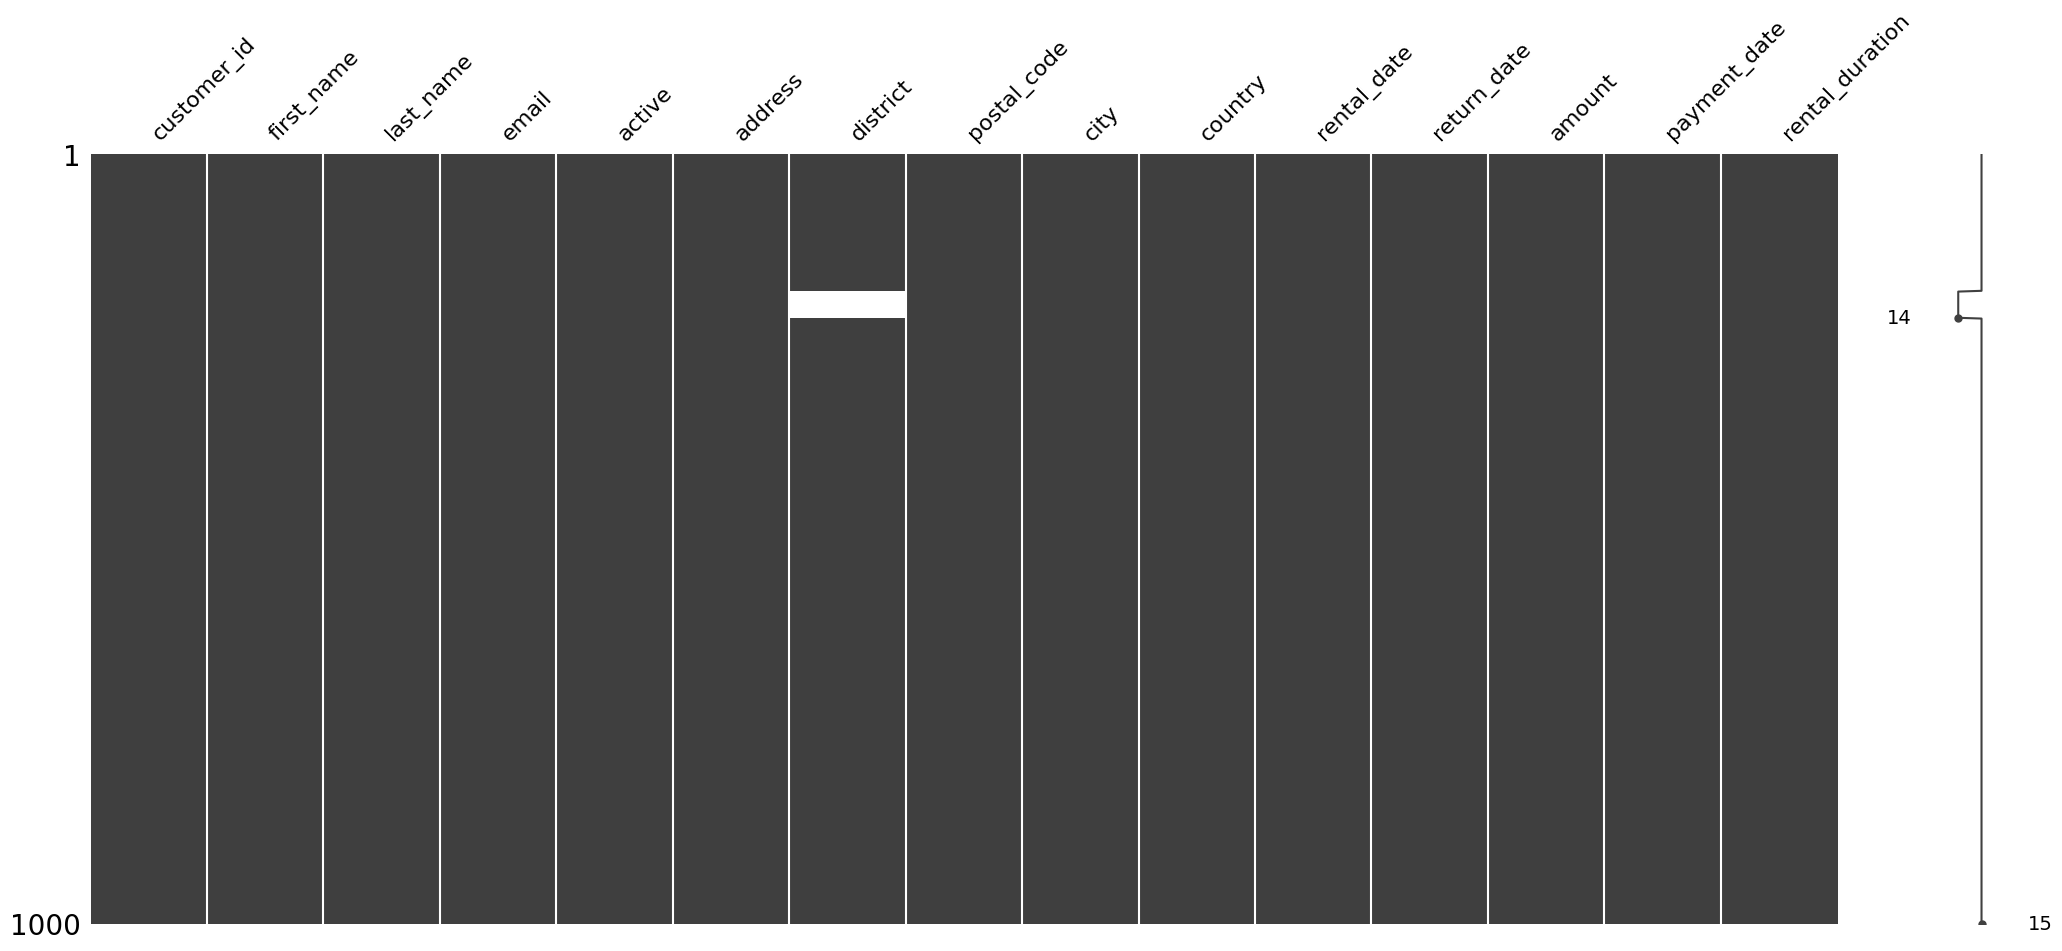

In [12]:
msno.matrix(df)
plt.show()

In [13]:
df[df['district'].isnull()]

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
178,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-05-26 03:09:30,2005-05-27 01:37:30,0.99,2005-05-26 03:09:30,1
179,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-05-27 13:46:46,2005-05-30 12:43:46,2.99,2005-05-27 13:46:46,3
180,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-05-29 23:37:00,2005-06-02 23:38:00,2.99,2005-05-29 23:37:00,4
181,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-06-15 16:31:08,2005-06-24 19:31:08,3.99,2005-06-15 16:31:08,9
182,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-06-17 02:55:32,2005-06-21 03:44:32,1.99,2005-06-17 02:55:32,4
183,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-06-18 16:55:08,2005-06-20 12:40:08,2.99,2005-06-18 16:55:08,2
184,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-06-18 17:14:42,2005-06-26 16:33:42,4.99,2005-06-18 17:14:42,8
185,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-06-21 18:07:07,2005-06-27 22:59:07,2.99,2005-06-21 18:07:07,6
186,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-07-06 15:22:19,2005-07-08 13:04:19,0.99,2005-07-06 15:22:19,2
187,381,bobby,boudreau,bobby.boudreau@sakilacustomer.org,1,1368 maracaíbo boulevard,NaN,32716,south hill,anguilla,2005-07-06 22:48:17,2005-07-15 19:07:17,2.99,2005-07-06 22:48:17,9


In [14]:
customer_activity_df['district'] = customer_activity_df['district'].fillna("dato vacio")

In [15]:
df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-15 20:25:53,2005-06-22 23:34:53,2.99,2005-06-15 20:25:53,7
1,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 05:49:46,2005-06-20 00:25:46,0.99,2005-06-18 05:49:46,2
2,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 06:10:23,2005-06-20 00:39:23,0.99,2005-06-18 06:10:23,2
3,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-08 20:31:43,2005-07-15 15:58:43,6.99,2005-07-08 20:31:43,7
4,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-09 12:10:44,2005-07-11 17:32:44,0.99,2005-07-09 12:10:44,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   first_name       1000 non-null   object 
 2   last_name        1000 non-null   object 
 3   email            1000 non-null   object 
 4   active           1000 non-null   int64  
 5   address          1000 non-null   object 
 6   district         965 non-null    object 
 7   postal_code      1000 non-null   int64  
 8   city             1000 non-null   object 
 9   country          1000 non-null   object 
 10  rental_date      1000 non-null   object 
 11  return_date      1000 non-null   object 
 12  amount           1000 non-null   float64
 13  payment_date     1000 non-null   object 
 14  rental_duration  1000 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [17]:
df_rellenar = customer_activity_df[customer_activity_df['customer_id'] == 381]

In [18]:
print(df_rellenar)

     customer_id first_name last_name                              email  \
178          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
179          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
180          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
181          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
182          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
183          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
184          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
185          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
186          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
187          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
188          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
189          381      bobby  boudreau  bobby.boudreau@sakilacustomer.org   
190         

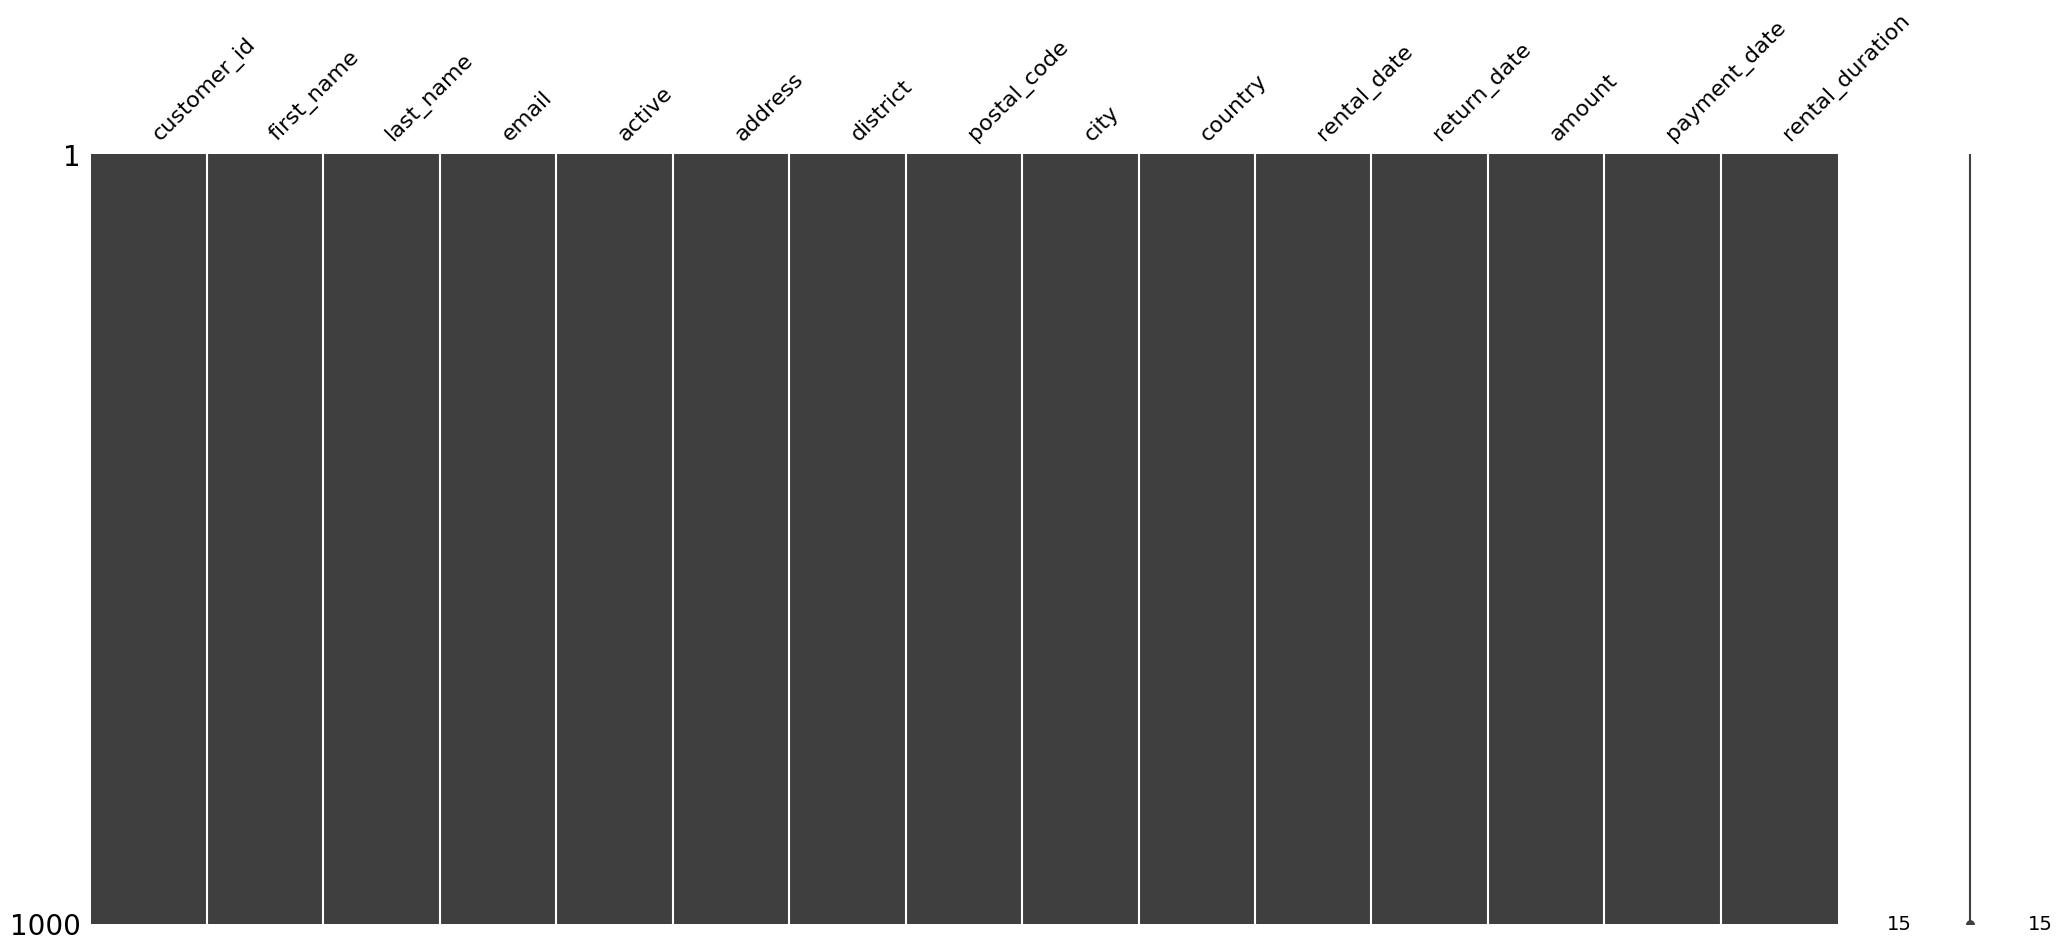

In [19]:
msno.matrix(customer_activity_df)
plt.show()

In [20]:
customer_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   object        
 2   last_name        1000 non-null   object        
 3   email            1000 non-null   object        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   object        
 6   district         1000 non-null   object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   object        
 9   country          1000 non-null   object        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

# Normalizar Cadenas usando Trim y lower

In [21]:
def clean_text(s):
  return s.astype(str).str.strip().str.lower()

  for col in customer_activity_df.columns:
    if customer_activity_df[col].dtype == "string":
      customer_activity_df[col] == clean_text(customer_activity_df[col])

In [22]:
customer_activity_df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-15 20:25:53,2005-06-22 23:34:53,2.99,2005-06-15 20:25:53,7
1,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 05:49:46,2005-06-20 00:25:46,0.99,2005-06-18 05:49:46,2
2,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 06:10:23,2005-06-20 00:39:23,0.99,2005-06-18 06:10:23,2
3,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-08 20:31:43,2005-07-15 15:58:43,6.99,2005-07-08 20:31:43,7
4,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-09 12:10:44,2005-07-11 17:32:44,0.99,2005-07-09 12:10:44,2


In [23]:
customer_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   object        
 2   last_name        1000 non-null   object        
 3   email            1000 non-null   object        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   object        
 6   district         1000 non-null   object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   object        
 9   country          1000 non-null   object        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

In [24]:
customer_activity_df['first_name',] = customer_activity_df['first_name'].astype('string')

In [25]:
customer_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   object        
 2   last_name        1000 non-null   object        
 3   email            1000 non-null   object        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   object        
 6   district         1000 non-null   object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   object        
 9   country          1000 non-null   object        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

In [26]:
columnas_a_transformar=['first_name', 'last_name', 'email', 'address', 'district', 'city', 'country']
customer_activity_df[columnas_a_transformar] = customer_activity_df[columnas_a_transformar].astype('string')

In [27]:
print(df.dtypes)

customer_id          int64
first_name          object
last_name           object
email               object
active               int64
address             object
district            object
postal_code          int64
city                object
country             object
rental_date         object
return_date         object
amount             float64
payment_date        object
rental_duration      int64
dtype: object


In [29]:
# 1. Calcular Q1 y Q3
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)

# 2. Calcular el RIC
RIC = Q3 - Q1

# 3. Definir los Límites
limite_inferior = Q1 - 1.5 * RIC
limite_superior = Q3 + 1.5 * RIC

# 4. Filtrar y mostrar solo los outliers
outliers = df[(df['amount'] < limite_inferior) | (df['amount'] > limite_superior)]

print("--- Límites de Detección ---")
print(f"Límite Superior (LS): {limite_superior:.2f}")
print("----------------------------")
print("Outliers (Valores > LS o < LI):")
print(outliers[['customer_id', 'amount']])

--- Límites de Detección ---
Límite Superior (LS): 7.99
----------------------------
Outliers (Valores > LS o < LI):
     customer_id  amount
7            218    8.99
23           441    8.99
35           441   10.99
49            69    8.99
77           176    8.99
135          528    9.99
142          528    8.99
152          383    8.99
206          381    8.99
213          359    8.99
221          359    9.99
242          560    9.99
268          322    8.99
273          322    8.99
289          322    9.99
292          322    8.99
312           24    8.99
326          445    8.99
332          445    9.99
369           89    8.99
376           89    8.99
432          585    9.99
440          585    8.99
444          585    9.99
480          331    8.99
483          331   10.99
559           41    9.99
598          173    8.99
607          173    8.99
628          159    8.99
651          266    8.99
673          333   10.99
686          334    8.99
719          590    9.99
749     

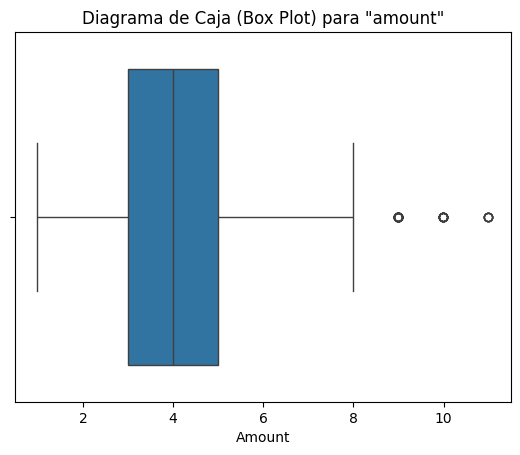

In [28]:
sns.boxplot(x=customer_activity_df['amount'])
plt.title('Diagrama de Caja (Box Plot) para "amount"')
plt.xlabel('Amount')
plt.show()

In [30]:
df['rental_date'] = pd.to_datetime(customer_activity_df['rental_date'])
df['return_date'] = pd.to_datetime(customer_activity_df['return_date'])

In [31]:
# Calcula la diferencia de tiempo (resultado es un objeto Timedelta)
time_difference = customer_activity_df['return_date'] - customer_activity_df['rental_date']

# Extrae la parte de los días de Timedelta
customer_activity_df['rental_duration_days'] = time_difference.dt.days

print(customer_activity_df[['rental_date', 'return_date', 'rental_duration_days']].head())

          rental_date         return_date  rental_duration_days
0 2005-06-15 20:25:53 2005-06-22 23:34:53                     7
1 2005-06-18 05:49:46 2005-06-20 00:25:46                     1
2 2005-06-18 06:10:23 2005-06-20 00:39:23                     1
3 2005-07-08 20:31:43 2005-07-15 15:58:43                     6
4 2005-07-09 12:10:44 2005-07-11 17:32:44                     2


In [32]:
customer_activity_df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration,"(first_name,)",rental_duration_days
0,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-15 20:25:53,2005-06-22 23:34:53,2.99,2005-06-15 20:25:53,7,vera,7
1,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 05:49:46,2005-06-20 00:25:46,0.99,2005-06-18 05:49:46,2,vera,1
2,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 06:10:23,2005-06-20 00:39:23,0.99,2005-06-18 06:10:23,2,vera,1
3,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-08 20:31:43,2005-07-15 15:58:43,6.99,2005-07-08 20:31:43,7,vera,6
4,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-09 12:10:44,2005-07-11 17:32:44,0.99,2005-07-09 12:10:44,2,vera,2


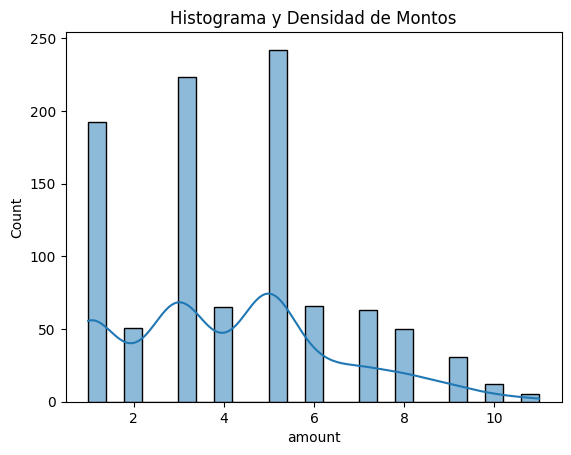

In [33]:
sns.histplot(data=df, x='amount', kde=True)
plt.title('Histograma y Densidad de Montos')
plt.show()

In [46]:
nombre_archivo_csv = "Customer_Activity_clean.csv"
files.download(nombre_archivo_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>